<a href="https://colab.research.google.com/github/HillaAnku/HillaAnku/blob/master/Bankturnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import all dependencies
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
bankturnover_df = pd.read_csv('bankturnover.csv')

In [3]:
# Quick view dataset
bankturnover_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# View data
bankturnover_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
# Split the data into two major groups, those customers who left the bank and those who did not.
exited_yes = bankturnover_df[(bankturnover_df['Exited']== 1)]
exited_yes.info()

exited_no = bankturnover_df[(bankturnover_df['Exited']== 0)]
exited_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        2037 non-null   int64  
 1   CustomerId       2037 non-null   int64  
 2   Surname          2037 non-null   object 
 3   CreditScore      2037 non-null   int64  
 4   Geography        2037 non-null   object 
 5   Gender           2037 non-null   object 
 6   Age              2037 non-null   int64  
 7   Tenure           2037 non-null   int64  
 8   Balance          2037 non-null   float64
 9   NumOfProducts    2037 non-null   int64  
 10  HasCrCard        2037 non-null   int64  
 11  IsActiveMember   2037 non-null   int64  
 12  EstimatedSalary  2037 non-null   float64
 13  Exited           2037 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 238.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7963 entries, 1 to 9999
Data columns (total

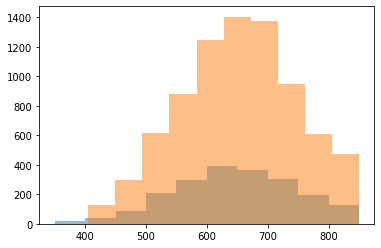

In [6]:
# Plot the histograms of the two groups

plt.hist(exited_yes['CreditScore'], alpha = 0.5)
plt.hist(exited_no['CreditScore'], alpha = 0.5)
plt.show()

Check for normality in the distributions of the two groups. I start here with a visual approach.
From the historgram plot, the distributions look approximately normally distributed.

In [7]:
# Let's empirically verify normality by checking the skewness and kurtosis of the credit score distributions
print(stats.describe(exited_yes['CreditScore']))
print(stats.describe(exited_no['CreditScore']))

DescribeResult(nobs=2037, minmax=(350, 850), mean=645.3514972999509, variance=10064.403893876835, skewness=-0.14097430258504315, kurtosis=-0.27635585777466254)
DescribeResult(nobs=7963, minmax=(405, 850), mean=651.8531960316463, variance=9149.656541843884, skewness=-0.047007302015925616, kurtosis=-0.4851806478784342)


The visuals showed that, the distrubutions are approximately normal, however, we need to confirm normality empirically by checking skewness and kurtosis of the two groups. 

It is important to note from this test that, non-loyal customers have a mean credit score of 645.3 which is lower than the loyal customer group which has a mean credit score of 651.9

The results here show that both kurtosis and skewness of the two groups are very close to 0. This confirms that credit score distributions are indeed approximately normally distributed.

In [8]:
# T-testing
stats.ttest_ind(exited_yes['CreditScore'], exited_no['CreditScore'])

Ttest_indResult(statistic=-2.7100778888729833, pvalue=0.006738213892192373)

The distributions are approximately normal, let's now perform a t-test to determine if the two groups are significantly different from each other.

The null hypothesis being tested is: Loyal and non-loyal customers have on average the same credit scores.
Result: Since the t-statitic > 1.96 and also p-value is < 0.05, we reject the null hypothesis.

The implication of rejecting this null hypothesis is that the two groups are significantly different in terms of their mean credit scores. 

In other words, this result shows that loyal customers have on avearge higher credit scores than non-loyal customers.


In [9]:
# Compute the confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(exited_yes['CreditScore'], exited_no['CreditScore'])

'The difference in means at the 95% confidence interval (two-tail) is between 1.6648974425122516 and 11.338500020878659.'

The difference in mean credit scores for the groups is estimated to be between 1.7 and 11.3 which is quite a difference. A small difference in credit scores can be a big deal, the confidence interval here shows that the average credit scores are quite different for loyal customers and non-loyal customers.

Given that on average, loyal customers have a higher credit score, I conclude that credit scores may be a good indicator of customer loyalty to the bank.  However, it is important to stress that even as credit scores may be an important indicator of loyalty, other factors may also be important in this regard and further research is required to identify these factors.